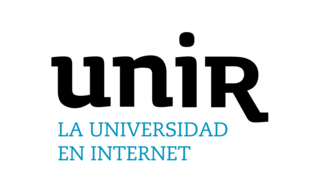

_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Actividad: Clasificación con máquinas de vectores de soporte y random forest

## Objetivos

Mediante esta actividad se pretende que ponga en práctica la creación de modelos basados en máquinas de vector de soporte y random forest. El objetivo es comprender de forma práctica con un problema determinado las diferencias que existen a la hora de entrenar los diferentes modelos.

- Comprender el tratamiento de datos que hay que realizar para los modelos de clasificación.
- Entender y aplicar el algoritmo de Random Forest a un problema de clasificación.
- Entender y aplicar el algoritmo de Support Vector Machine a un problema de clasificación.
- Evaluar y analizar los resultados de los clasificadores.
- Investigar la aplicación de los modelos de clasificación a problemas reales.


## Descripción de la actividad

Debes completar los espacios indicados en el notebook con el código solicitado y la respuesta, en función de lo que se solicite. Ten en cuenta que las celdas vacías indican cuántas líneas debe ocupar la respuesta, por lo general no más de una línea.

El conjunto de datos con el que vamos a trabajar se encuentra en el siguiente enlace: https://archive.ics.uci.edu/dataset/31/covertype

Este dataset ha sido generado para predecir el tipo de cubierta forestal únicamente a partir de variables cartográficas (sin datos de sensores remotos). El tipo de cubierta forestal real para una observación determinada (celda de 30 x 30 metros) se determinó a partir de los datos del Sistema de información de recursos (RIS) de la Región 2 del Servicio Forestal de EE. UU. (USFS). Las variables independientes se derivaron de datos obtenidos originalmente del Servicio Geológico de EE. UU. (USGS) y de datos del USFS. Los datos están en forma original (no escalados) y contienen columnas binarias (0 o 1) de datos para variables cualitativas independientes (áreas silvestres y tipos de suelo).
Para ampliar información sobre el dataset y su origen, recomendamos leer la descripción completa del dataset en el enlace del repositorio. l.

El objetivo de la clasificación será detectar el tipo de suelo.

### Tareas que se deben realizar

- Análisis descriptivo de los datos:
   - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Clasificación:
  - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Investigación:
  - Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de clasificación empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.
  - Para el artículo indicar:
    - Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la clasificación.
    - Cómo utilizan las técnicas de clasificación, si realizan alguna adaptación de los algoritmos indicarse.
    - Principales resultados de la aplicación y de la investigación.


### Análisis descriptivo de los datos

In [20]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
# se carga el dataset
df = pd.read_csv('data/covtype.data')


¿Cuántas instancias de datos tiene el dataset?

Según la documentación `covtype.info` deberían existir 581,012 instancias

In [8]:

df.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type32  Soil_Type33  \
0                                6279  ...            0            0   
1                                6225  ...            0            0   
2                                6121  ...            0            0   
3                                6211  ...            0            0   
4                                6172  ...            0            0   

   Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type39  Soil_Type40  Cover_Type  
0            0            0           5  
1            0            0           5  
2            0            0           2  
3            0            0           2  
4            0            0           5  

[5 rows x 55 columns]

In [20]:
df.count()

Elevation                             581012
Aspect                                581012
Slope                                 581012
Horizontal_Distance_To_Hydrology      581012
Vertical_Distance_To_Hydrology        581012
Horizontal_Distance_To_Roadways       581012
Hillshade_9am                         581012
Hillshade_Noon                        581012
Hillshade_3pm                         581012
Horizontal_Distance_To_Fire_Points    581012
Wilderness_Area1                      581012
Wilderness_Area2                      581012
Wilderness_Area3                      581012
Wilderness_Area4                      581012
Soil_Type1                            581012
Soil_Type2                            581012
Soil_Type3                            581012
Soil_Type4                            581012
Soil_Type5                            581012
Soil_Type6                            581012
Soil_Type7                            581012
Soil_Type8                            581012
Soil_Type9

In [16]:
df.shape

(581012, 55)

## 581012 instancias

¿Cuántas variables continuas hay en el dataset?

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [15]:
df.describe()

Elevation         Aspect          Slope  \
count  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704   
std       279.984734     111.913721       7.488242   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       30.000000   
75%                          384.000000                       69.000000   
max                         1397.000000                      601.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                    581012.000000  581012.000000   581012.000000   
mean                       2350.146611     212.146049      223.318716   
std                        1559.254870      26.769889       19.768697   
min                           0.000000       0.000000        0.000000   
25%                        1106.000000     198.000000      213.000000   
50%                        1997.000000     218.000000      226.000000   
75%                        3328.000000     231.000000      237.000000   
max                        7117.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  ...    Soil_Type32  \
count  581012.000000                       581012.000000  ...  581012.000000   
mean      142.528263                         1980.291226  ...       0.090392   
std        38.274529                         1324.195210  ...       0.286743   
min         0.000000                            0.000000  ...       0.000000   
25%       119.000000                         1024.000000  ...       0.000000   
50%       143.000000                         1710.000000  ...       0.000000   
75%       168.000000                         2550.000000  ...       0.000000   
max       254.000000                         7173.000000  ...       1.000000   

         Soil_Type33    Soil_Type34    Soil_Type35    Soil_Type36  \
count  581012.000000  581012.000000  581012.000000  581012.000000   
mean        0.077716       0.002773       0.003255       0.000205   
std         0.267725       0.052584       0.056957       0.014310   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

         Soil_Type37    Soil_Type38    Soil_Type39    Soil_Type40  \
count  581012.000000  581012.000000  581012.000000  581012.000000   
mean        0.000513       0.026803       0.023762       0.015060   
std         0.022641       0.161508       0.152307       0.121791   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

          Cover_Type  
count  581012.000000  
mean        2.051471  
std         1.396504  
min         1.000000  
25%         1.000000  
50%         2.000000  
75%         2.000000  
max         7.000000  

[8 rows x 55 colu

In [17]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

# Variables Continuas

- Elevation
- Aspect
- Slope
- Horizontal_Distance_To_Hydrology
- Vertical_Distance_To_Hydrology
- Horizontal_Distance_To_Roadways
- Hillshade_9am
- Hillshade_Noon
- Hillshade_3pm
- Horizontal_Distance_To_Fire_Points

¿Cuántas variables categóricas hay en el dataset? Indica las categorías.

Hay 45 variables categóricas (divididas en 3 tipos de variables categóricas), que son aquellas que pueden tener un nº determinado de "tipos". En lenguajes de programación las podríamos denominar _enumeraciones_. Los 3 tipos de variables categóricas son:

- Wilderness_Area (1 de Rawah Wilderness Area, 2 de Neota Wilderness Area, 3 de Comanche Peak Wilderness Area y 4 de Cache la Poudre Wilderness Area): Cuando toma el valor "0" indica ausencia de valor y el "1" es presencia de valor.
- Soil_Type (columnas de la 1 a la 40, en el info se puede ver que cada columna se corresponde con un tipo de suelo o tierra): Cuando toma el valor "0" indica ausencia de valor y el "1" es presencia de valor.
- Cover_Type: del 1 al 7, incluye 7 tipos:
    - 1: Spruce/Fir
    - 2: Lodgepole Pine
    - 3: Ponderosa Pine
    - 4: Cottonwood/Willow
    - 5: Aspen
    - 6: Douglas-fir
    - 7: Krummholz 
        
La variable objetivo es `Cover_Type`.

¿Cómo es la distribución de etiquetas de clase en el dataset? Con estos datos, ¿podríamos decir que el dataset está balanceado?

<Axes: xlabel='Cover_Type', ylabel='Cover_Type'>

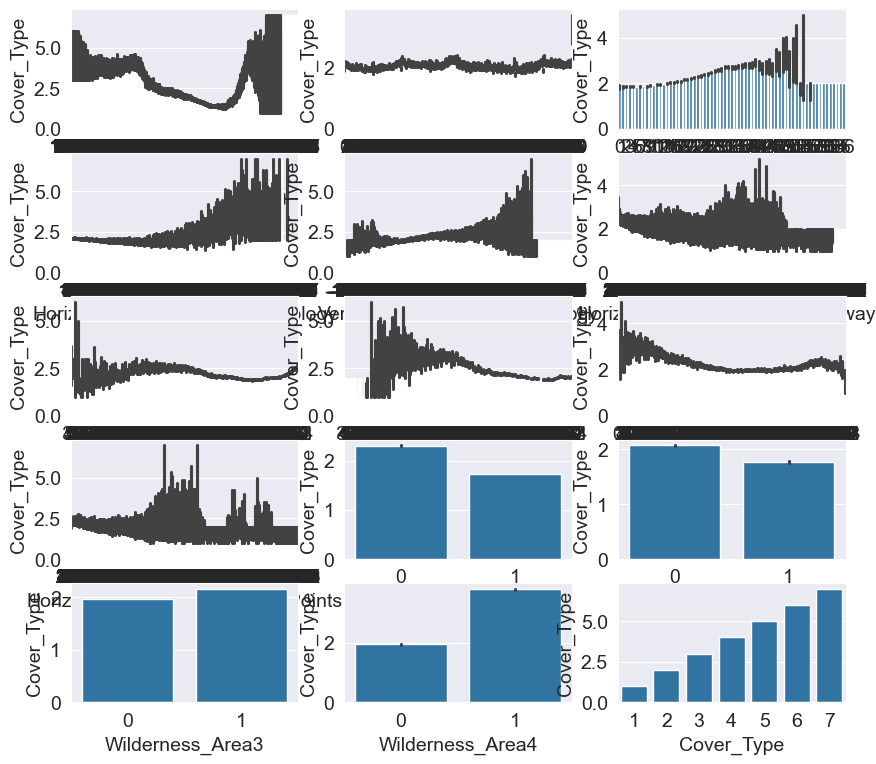

In [23]:
mpl.rc('font', size=14)
mpl.rc('axes', titlesize=15)
figure, axes = plt.subplots(nrows=5, ncols=3) # M 3rows 2columns
figure.set_size_inches(10, 9) # Tamaño total de la figura

sns.barplot(x='Elevation', y='Cover_Type', data=df, ax=axes[0, 0])
sns.barplot(x='Aspect', y='Cover_Type', data=df, ax=axes[0, 1])
sns.barplot(x='Slope', y='Cover_Type', data=df, ax=axes[0, 2])
sns.barplot(x='Horizontal_Distance_To_Hydrology', y='Cover_Type', data=df, ax=axes[1, 0])
sns.barplot(x='Vertical_Distance_To_Hydrology', y='Cover_Type', data=df, ax=axes[1, 1])
sns.barplot(x='Horizontal_Distance_To_Roadways', y='Cover_Type', data=df, ax=axes[1, 2])
sns.barplot(x='Hillshade_9am', y='Cover_Type', data=df, ax=axes[2, 0])
sns.barplot(x='Hillshade_Noon', y='Cover_Type', data=df, ax=axes[2, 1])
sns.barplot(x='Hillshade_3pm', y='Cover_Type', data=df, ax=axes[2, 2])
sns.barplot(x='Horizontal_Distance_To_Fire_Points', y='Cover_Type', data=df, ax=axes[3, 0])
sns.barplot(x='Wilderness_Area1', y='Cover_Type', data=df, ax=axes[3, 1])
sns.barplot(x='Wilderness_Area2', y='Cover_Type', data=df, ax=axes[3, 2])
sns.barplot(x='Wilderness_Area3', y='Cover_Type', data=df, ax=axes[4, 0])
sns.barplot(x='Wilderness_Area4', y='Cover_Type', data=df, ax=axes[4, 1])
# sns.barplot(x='Cover_Type', y='Cover_Type', data=df, ax=axes[4, 2])

ValueError: num must be an integer with 1 <= num <= 8, not 9

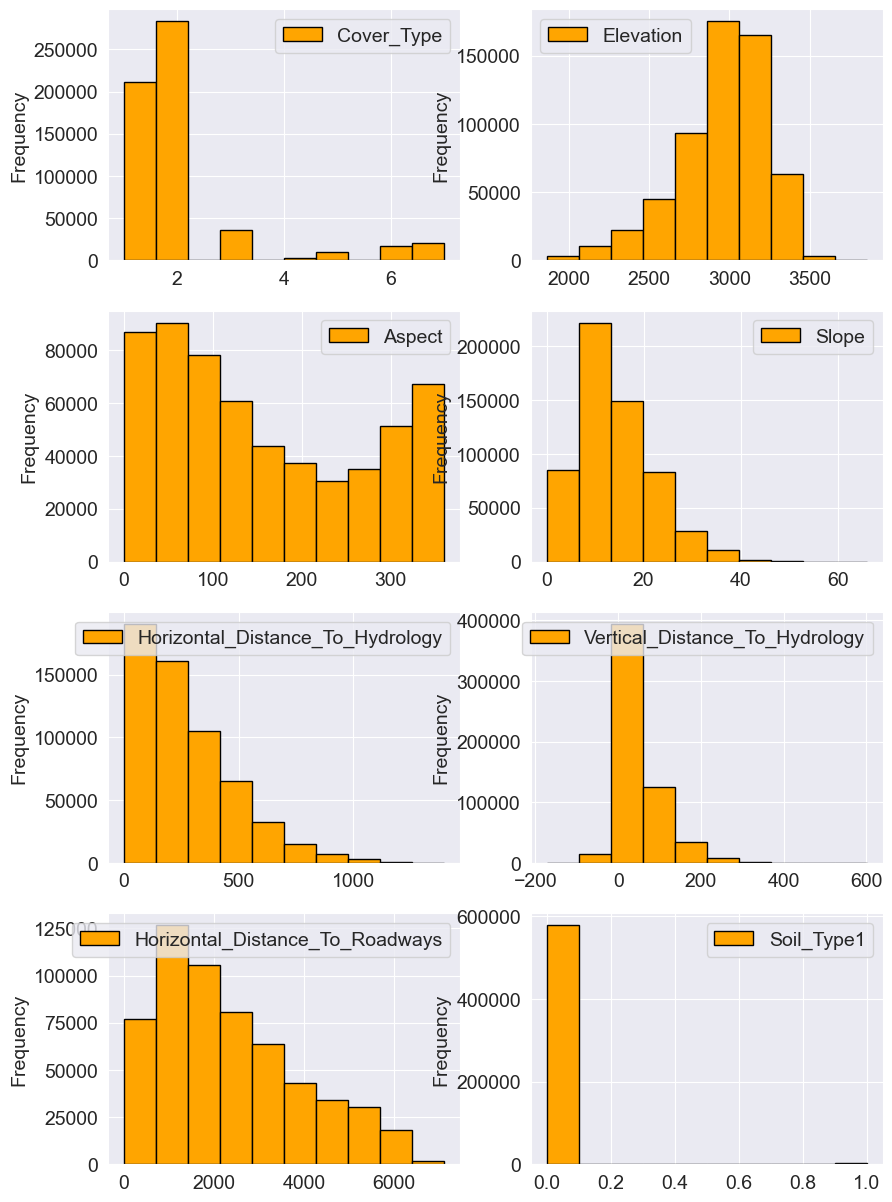

In [46]:
plt.figure(figsize=(10,15))

plt.subplot(421)
df['Cover_Type'].plot.hist(bins=10, color='orange', label='Cover_Type', edgecolor='black')
plt.legend(loc='best')

plt.subplot(422)
df['Elevation'].plot.hist(bins=10, color='orange', label='Elevation', edgecolor='black')
plt.legend(loc='best')

plt.subplot(423)
df['Aspect'].plot.hist(bins=10, color='orange', label='Aspect', edgecolor='black')
plt.legend(loc='best')

plt.subplot(424)
df['Slope'].plot.hist(bins=10, color='orange', label='Slope', edgecolor='black')
plt.legend(loc='best')

plt.subplot(425)
df['Horizontal_Distance_To_Hydrology'].plot.hist(bins=10, color='orange', label='Horizontal_Distance_To_Hydrology', edgecolor='black')
plt.legend(loc='best')

plt.subplot(426)
df['Vertical_Distance_To_Hydrology'].plot.hist(bins=10, color='orange', label='Vertical_Distance_To_Hydrology', edgecolor='black')
plt.legend(loc='best')

plt.subplot(427)
df['Horizontal_Distance_To_Roadways'].plot.hist(bins=10, color='orange', label='Horizontal_Distance_To_Roadways', edgecolor='black')
plt.legend(loc='best')

plt.subplot(428)
df['Soil_Type1'].plot.hist(bins=10, color='orange', label='Soil_Type1', edgecolor='black')
plt.legend(loc='best')

plt.subplot(429)
df['Soil_Type2'].plot.hist(bins=10, color='orange', label='Soil_Type2', edgecolor='black')
plt.legend(loc='best')

plt.tight_layout();

Salvo las características de "wilderness área" y "cover type" (que son 5), podemos apreciar ciertas distribuciones. 

Cover type está desbalanceada, ya que sus valores más repetidos son el 1 y el 2.

Sin embargo, no podemos asegurar al 100% que el dataset esté balanceado (por mucho que por cada feature la media se parezca mucho al percentil 50). Para ello, tenemos que calcular las matrices de confusión y la precisión, Recall y F1-score.

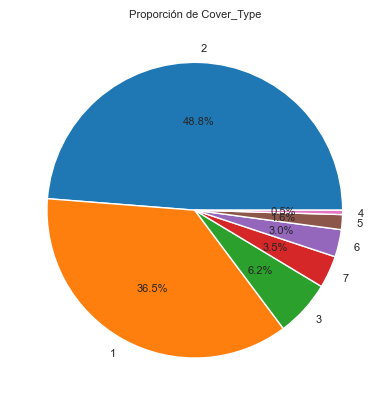

In [61]:
cover_type_counts = df["Cover_Type"].value_counts()
plt.pie(cover_type_counts, labels = cover_type_counts.index, autopct="%1.1f%%")
plt.title("Proporción de Cover_Type")
plt.show()

¿Existen valores nulos o perdidos en el dataset?

In [ ]:
## PON AQUÍ TU CÓDIGO

Como hemos visto anteriormente con `df.info()`, todas las columnas se corresponden con la cantidad de instancias totales, por lo que no hay valores nulos o perdidos.

¿Existe alguna variable altamente correlacionada con la variable de clase?

_Nota: Para responder a esto, como es muy difícil ver la matriz de correlaciones, recomendamos filtrar aquellas correlaciones superiores al 0.80 con la variable de clase.

Las variables más correlacionadas son las siguientes:
- Elevation y Aspect: están altamente correlacionadas debido a la relación entre la altitud y la orientación de la ladera.
- Bandas 1 y 2: Estas dos bandas están altamente correlacionadas debido a que ambas miden la reflectancia en el espectro visible.
- Bandas 4 y 5: Estas dos bandas están altamente correlacionadas debido a que ambas miden la reflectancia en el infrarrojo cercano.
Con la variable objetivo no podemos ver ninguna correlación fuerte.

In [39]:
corr = df.corr(method ='pearson', )
filteredDf = corr[((corr >= .5) | (corr <= -.5)) & (corr !=1.000) ]
filteredDf

Elevation    Aspect     Slope  \
Elevation                                 NaN       NaN       NaN   
Aspect                                    NaN       NaN       NaN   
Slope                                     NaN       NaN       NaN   
Horizontal_Distance_To_Hydrology          NaN       NaN       NaN   
Vertical_Distance_To_Hydrology            NaN       NaN       NaN   
Horizontal_Distance_To_Roadways           NaN       NaN       NaN   
Hillshade_9am                             NaN -0.579273       NaN   
Hillshade_Noon                            NaN       NaN -0.526911   
Hillshade_3pm                             NaN  0.646944       NaN   
Horizontal_Distance_To_Fire_Points        NaN       NaN       NaN   
Wilderness_Area1                          NaN       NaN       NaN   
Wilderness_Area2                          NaN       NaN       NaN   
Wilderness_Area3                          NaN       NaN       NaN   
Wilderness_Area4                    -0.619374       NaN       NaN   
Soil_Type1                                NaN       NaN       NaN   
Soil_Type2                                NaN       NaN       NaN   
Soil_Type3                                NaN       NaN       NaN   
Soil_Type4                                NaN       NaN       NaN   
Soil_Type5                                NaN       NaN       NaN   
Soil_Type6                                NaN       NaN       NaN   
Soil_Type7                                NaN       NaN       NaN   
Soil_Type8                                NaN       NaN       NaN   
Soil_Type9                                NaN       NaN       NaN   
Soil_Type10                               NaN       NaN       NaN   
Soil_Type11                               NaN       NaN       NaN   
Soil_Type12                               NaN       NaN       NaN   
Soil_Type13                               NaN       NaN       NaN   
Soil_Type14                               NaN       NaN       NaN   
Soil_Type15                               NaN       NaN       NaN   
Soil_Type16                               NaN       NaN       NaN   
Soil_Type17                               NaN       NaN       NaN   
Soil_Type18                               NaN       NaN       NaN   
Soil_Type19                               NaN       NaN       NaN   
Soil_Type20                               NaN       NaN       NaN   
Soil_Type21                               NaN       NaN       NaN   
Soil_Type22                               NaN       NaN       NaN   
Soil_Type23                               NaN       NaN       NaN   
Soil_Type24                               NaN       NaN       NaN   
Soil_Type25                               NaN       NaN       NaN   
Soil_Type26                               NaN       NaN       NaN   
Soil_Type27                               NaN       NaN       NaN   
Soil_Type28                               NaN       NaN       NaN   
Soil_Type29                               NaN       NaN       NaN   
Soil_Type30                               NaN       NaN       NaN   
Soil_Type31                               NaN       NaN       NaN   
Soil_Type32                               NaN       NaN       NaN   
Soil_Type33                               NaN       NaN       NaN   
Soil_Type34                               NaN       NaN       NaN   
Soil_Type35                               NaN       NaN       NaN   
Soil_Type36                               NaN       NaN       NaN   
Soil_Type37                               NaN       NaN       NaN   
Soil_Type38                               NaN       NaN       NaN   
Soil_Type39                               NaN       NaN       NaN   
Soil_Type40                               NaN       NaN       NaN   
Cover_Type                                NaN       NaN       NaN   

                                    Horizontal_Distance_To_Hydrology  \
Elevation                                                        NaN   
Aspect                     

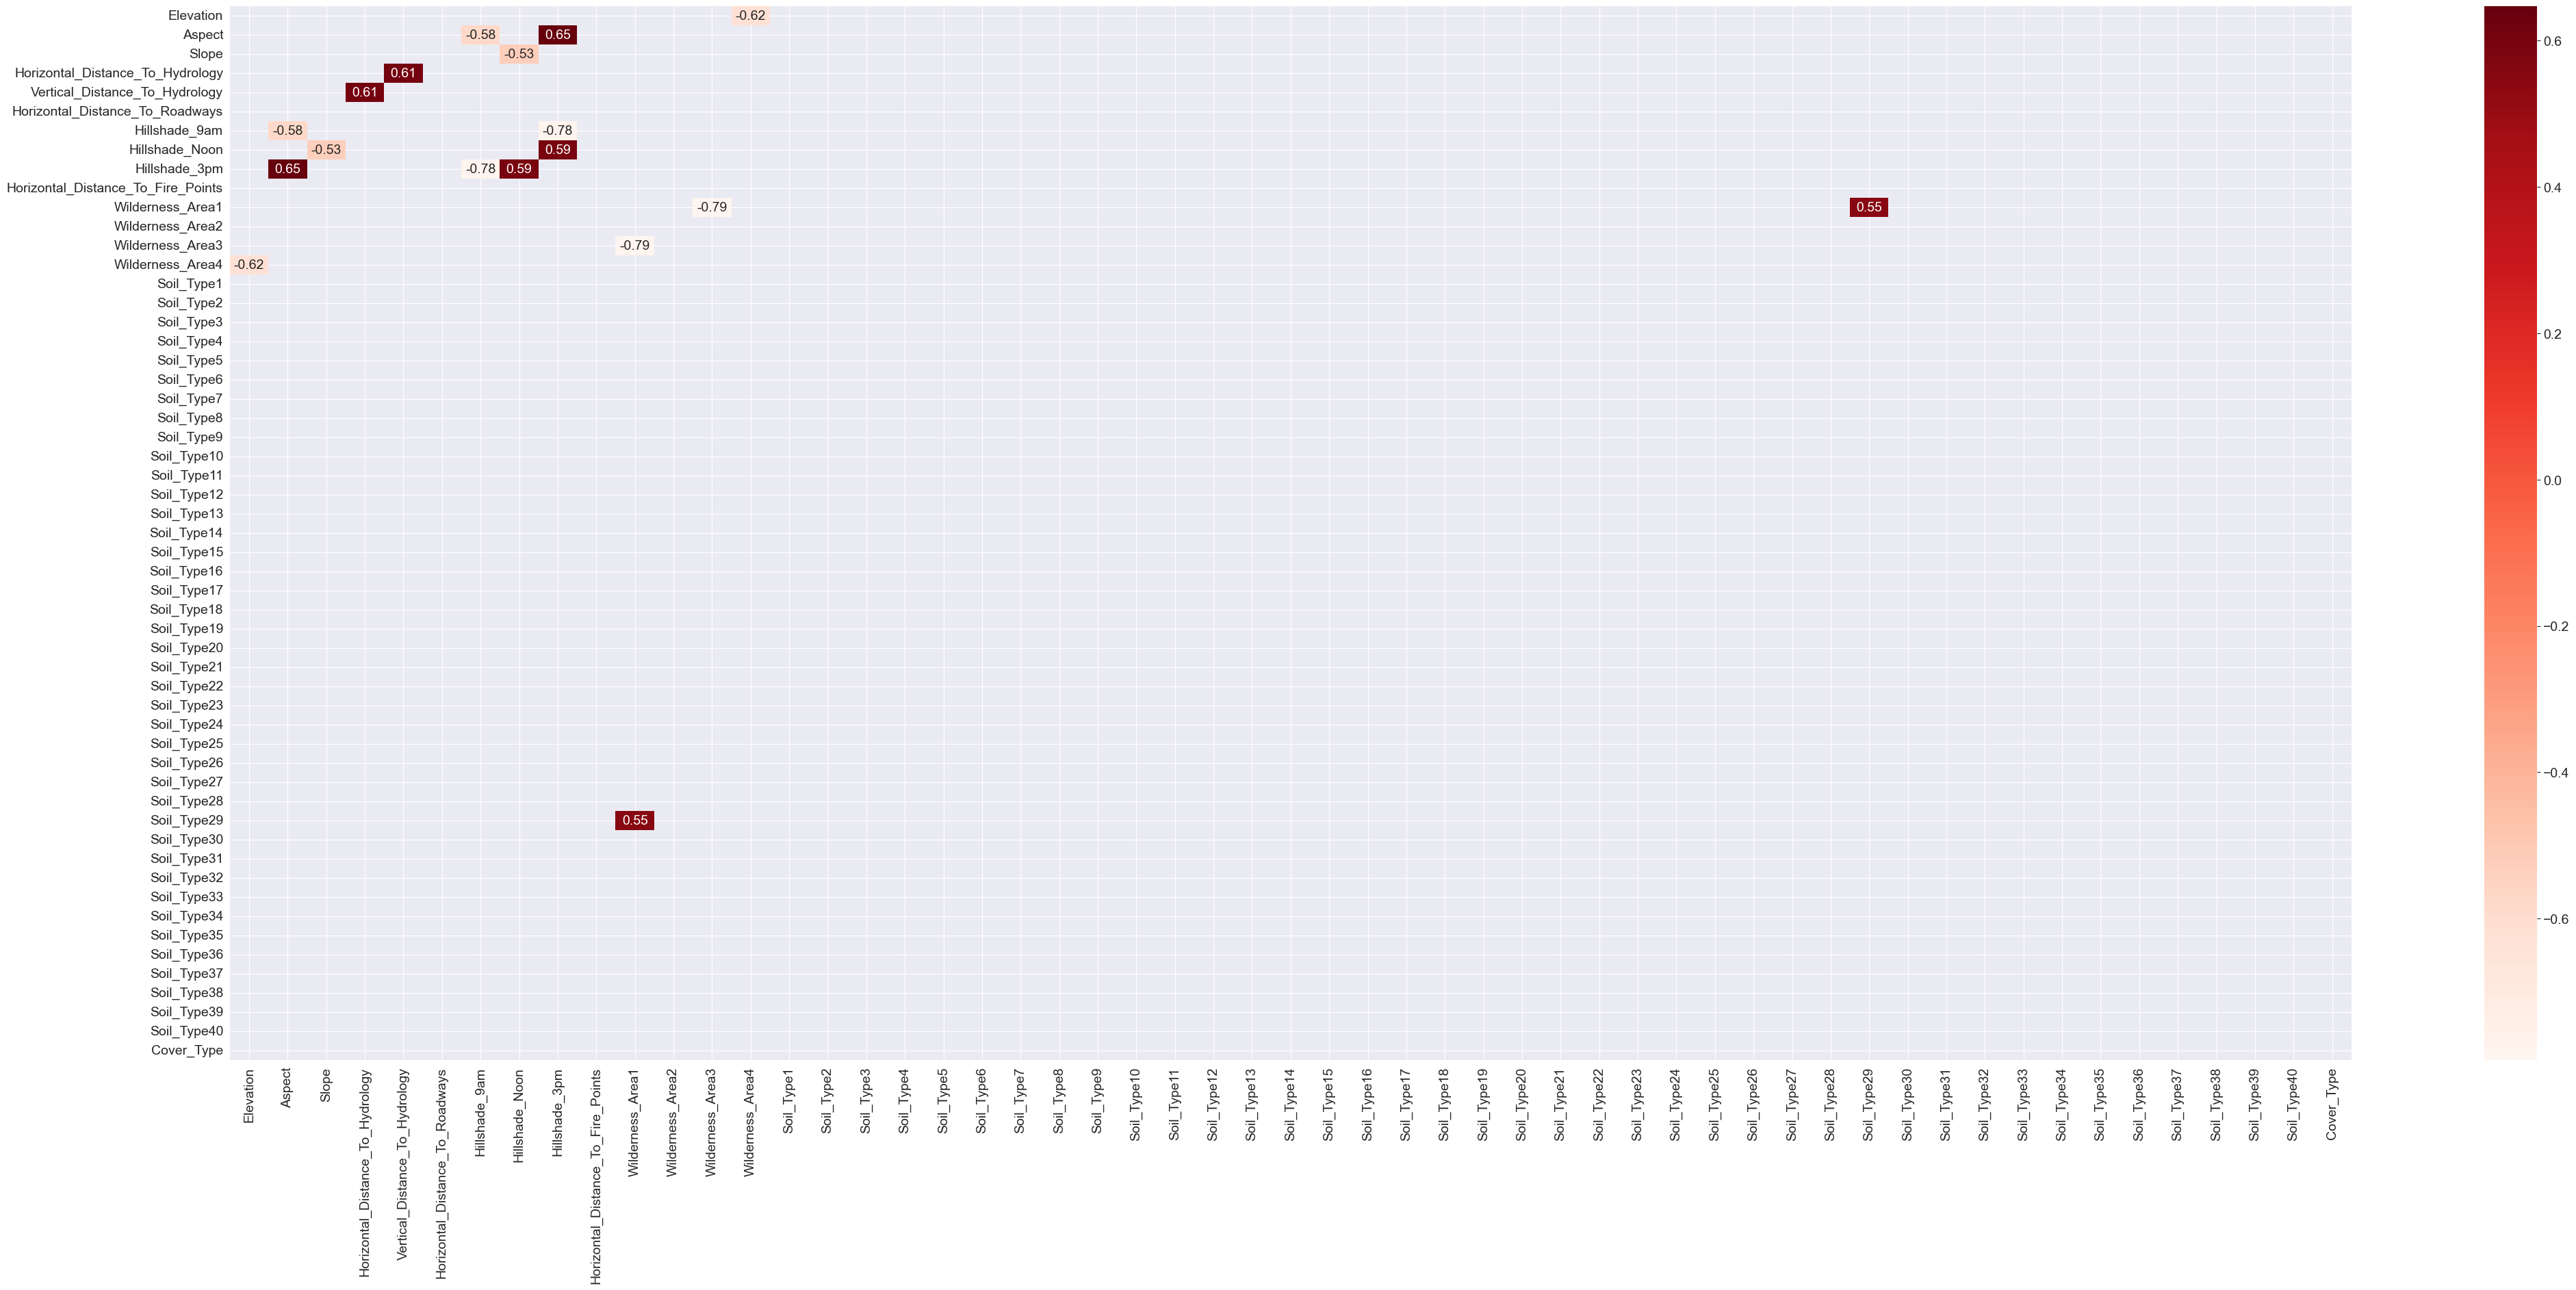

In [40]:
plt.figure(figsize=(50,20))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

¿Qué tres variables del dataset consideras que pueden influenciar más en la clasificación de los datos? ¿Qué pruebas harías para comprobar tus hipótesis? Hazlas.

Lo que haría serían gráficos de histograma de distintas variables con Cover_Type, para el caso de las variables categóricas (para el caso de variables continuas, tenemos la matriz de correlaciones).

En cuanto a las continuas, supongo que las variables relacionadas con el agua (distancia horizontal y vertical hasta la hidrología) y las de la sombra tendrán bastante relación.

In [12]:
def plot_histograms(df_here, col_soil_type, cover_type_col):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_here, x=col_soil_type, hue=cover_type_col, element="step", stat="density", common_norm=False)
    plt.title(f"Distribución de {col_soil_type} por {cover_type_col}")
    plt.show()

In [15]:
def plot_scatterplots(df_here, col_soil_type, cover_type_col):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_here, x=col_soil_type, y=cover_type_col, hue="Cover_Type", alpha=0.7)
    plt.title(f"Relación entre {col_soil_type} y {cover_type_col}")
    plt.show()

In [13]:
soil_type_cols = [col for col in df.columns if col.startswith("Soil_Type")]

In [30]:
def plot_countplot_soil_types_to_cover_type(df_here, col_soil_type):
    for soil_type in df_here[col_soil_type].unique():
        df_filtered = df_here[df_here[col_soil_type] == soil_type]
        sns.countplot(x="Cover_Type", data=df_filtered)
        plt.title(f"Frecuencia de {col_soil_type} para {soil_type}")
        plt.show()

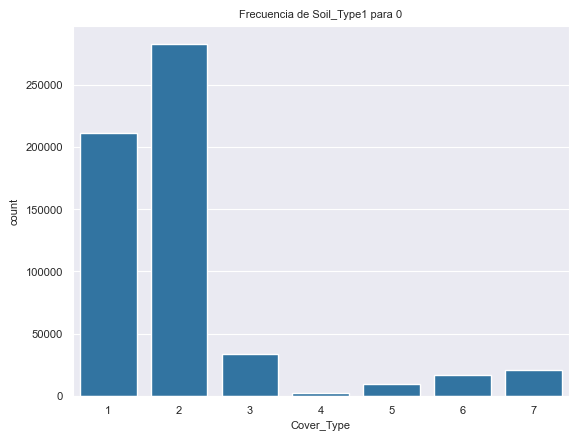

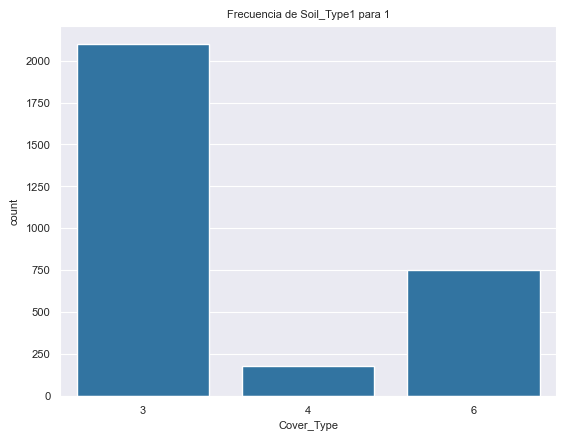

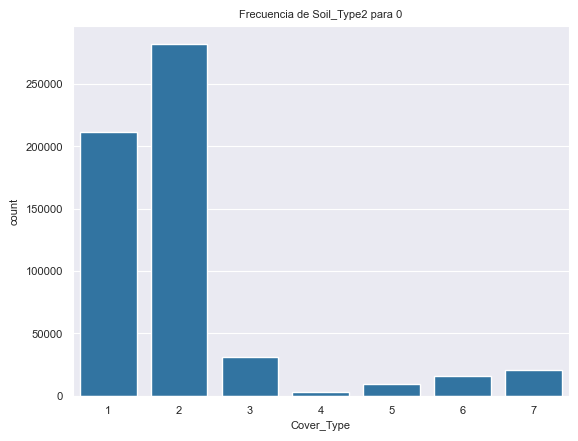

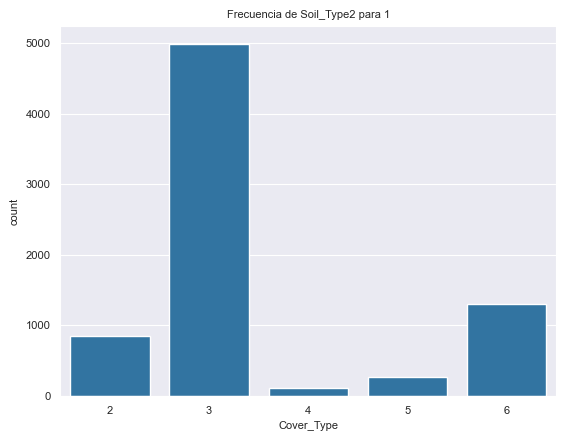

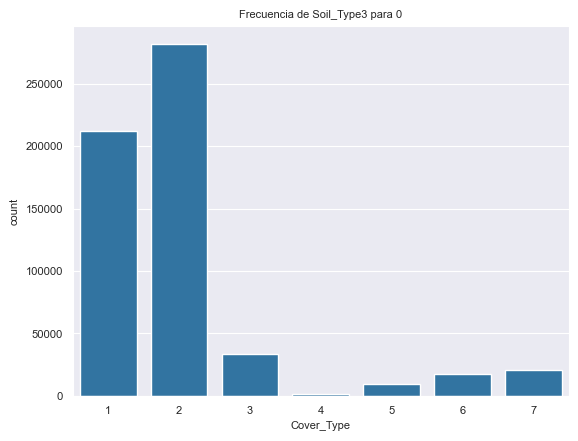

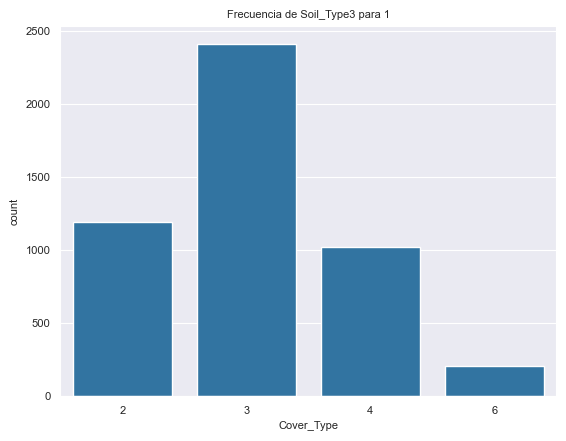

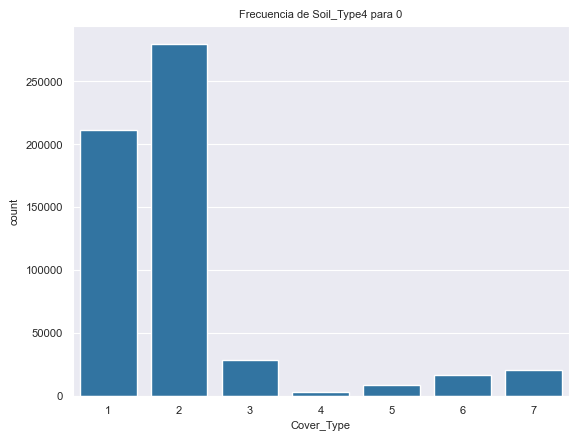

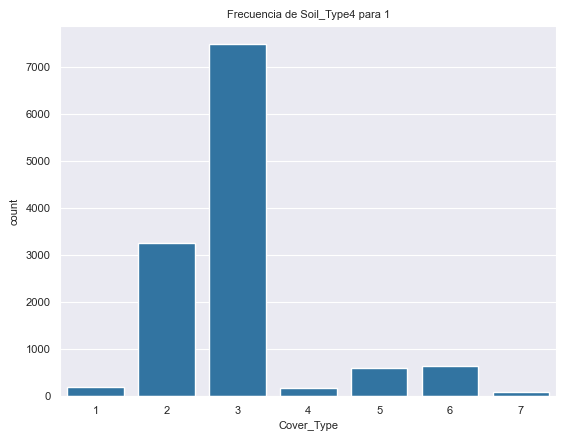

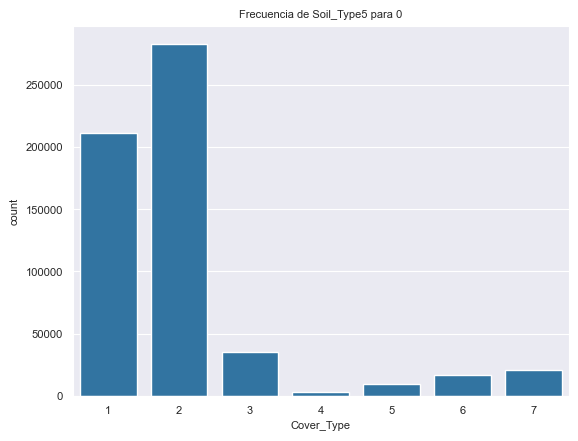

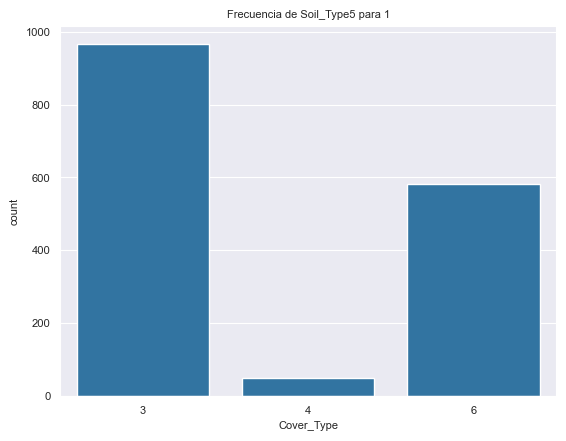

In [31]:
plot_countplot_soil_types_to_cover_type(df, "Soil_Type1")
plot_countplot_soil_types_to_cover_type(df, "Soil_Type2")
plot_countplot_soil_types_to_cover_type(df, "Soil_Type3")
plot_countplot_soil_types_to_cover_type(df, "Soil_Type4")
plot_countplot_soil_types_to_cover_type(df, "Soil_Type5")

In [43]:
from scipy.stats import chi2_contingency

def chi2_soil_types(soil_type):
    contingency_table = pd.crosstab(df["Cover_Type"], df[soil_type])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"Tabla de contingencia entre [Cover_Type] y [{soil_type}]:")
    print(contingency_table)
    
    print("Chi-cuadrado:", chi2)
    print("p-valor:", p)

Tabla de contingencia entre [Cover_Type] y [Soil_Type1]:
Soil_Type1       0     1
Cover_Type              
1           211840     0
2           283301     0
3            33653  2101
4             2569   178
5             9493     0
6            16615   752
7            20510     0
Chi-cuadrado: 29240.39771783075
p-valor: 0.0
Tabla de contingencia entre [Cover_Type] y [Soil_Type2]:
Soil_Type2       0     1
Cover_Type              
1           211840     0
2           282449   852
3            30763  4991
4             2632   115
5             9229   264
6            16064  1303
7            20510     0
Chi-cuadrado: 55674.09211650502
p-valor: 0.0
Tabla de contingencia entre [Cover_Type] y [Soil_Type3]:
Soil_Type3       0     1
Cover_Type              
1           211840     0
2           282110  1191
3            33343  2411
4             1729  1018
5             9493     0
6            17164   203
7            20510     0
Chi-cuadrado: 61610.03279622186
p-valor: 0.0
Tabla de contingenc

In [ ]:
for i in range(1, 41):
    chi2_soil_types(f"Soil_Type{i}")

Si el valor de p es menor que el nivel de significancia elegido, que suele ser 0.05, entonces se puede rechazar la hipótesis nula de que no hay asociación entre las variables.

In [22]:
# Separamos los datos en los conjuntos de entrenamiento y test.
from sklearn.model_selection import train_test_split

X, y = df.drop('Cover_Type',axis=1), df['Cover_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=1)

### Clasificación

**Random Forest**

En esta parte de la actividad hay que utilizar la librería https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html para resolver el problema de clasificación.

El algortimo de RF necesitar ajustar una serie de hiperparámetros para realizar las clasificaciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de clasificación, nos tenemos que preocupar de los siguientes hiperparámetros:
- n_estimators
- criterion
- max_depth
- min_samples_split
- min_samples_leaf
- max_features

Indica qué son cada uno de estos hiperparámetros

- n_estimators: la cantidad de árboles que se van a "calcular"
- criterion: la función para medir la calidad de la partición. Las opciones disponibles son "gini" (para Gini Impurity, por defecto), "entropy" y "log_loss" (las dos para la ganancia de información de Shannon)
- max_depth: la máxima profundidad del árbol. Si no se indica, todos los nodos son expandidos hasta que las hojas sean puras o todas las hojas contengan menos que min_samples_split muestras.
- min_samples_split: la mínima cantidad de muestras requeridas para partir un nodo. Por defecto será 2. 
- min_samples_leaf: la mínima cantidad de muestras para que un nodo sea considerado hoja.  
- max_features: el nº de características a considerar cuando se busque la mejor partición.

Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro _class_weight_

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

Sirve para indicar los pesos que se le asigna a cada etiqueta de clase en la forma `{class_label: weight}`. Creo que puede ser útil cuando quieres dar un peso mayor a una clase en concreto.

Como primer paso para crear un clasificador de Random Forest hay que decidir si hay que hacer algún preprocesamiento adicional sobre los datos.
¿Hace falta normalizar los datos?

# Resp.

No tenemos variables o features que sean categóricas como hemos visto en clase, e.g. columnas que indiquen qué día de la semana es y, por lo tanto, tengamos que usar técnicas como hot-one encoding. Sin embargo, sí que es verdad que debería haber calculado los valores atípicos mediante gráficos de tipo box-plot (primero) y luego decidir qué hacer. Sin embargo, por falta de tiempo, no lo voy a hacer...

Entrena un conjunto de modelos de Random Forest que utilicen todas las variables del dataset, con 5, 10, 20, 50 y 100 árboles. El criterio para realizar las particiones debe ser Gini-index, la profundidad máxima de los árboles debe ser 10, el número mínimo de ejemplos para realizar una partición debe ser 10, el número mínimo de ejemplos para considerarlo una hoja debe ser 2, y el número máximo de características deben ser todas.

_Nota: el entrenamiento puede tardar entre 3 y 15 minutos en función de las características del equipo._

In [25]:
# numero de árboles: 5, 10, 20, 50 y 100
from sklearn.ensemble import RandomForestClassifier

n_arboles = {5, 10, 20, 50, 100}
particion = "gini"
max_depth = 10
min_samples_split = 10 
min_samples_leaf = 2
max_features = None

rf_model = [RandomForestClassifier(n_estimators = i, criterion= particion,
                                       max_depth = max_depth, min_samples_split = min_samples_split,
                                      min_samples_leaf = min_samples_leaf, max_features = max_features) for i in n_arboles]


In [26]:
# PON AQUÍ TU CÓDIGO PARA EL ENTRENAMIENTO
rf_model

[RandomForestClassifier(max_depth=10, max_features=None, min_samples_leaf=2,
                        min_samples_split=10, n_estimators=50),
 RandomForestClassifier(max_depth=10, max_features=None, min_samples_leaf=2,
                        min_samples_split=10),
 RandomForestClassifier(max_depth=10, max_features=None, min_samples_leaf=2,
                        min_samples_split=10, n_estimators=5),
 RandomForestClassifier(max_depth=10, max_features=None, min_samples_leaf=2,
                        min_samples_split=10, n_estimators=20),
 RandomForestClassifier(max_depth=10, max_features=None, min_samples_leaf=2,
                        min_samples_split=10, n_estimators=10)]

In [27]:
rf_model[3].fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=None, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=20)

In [28]:
y_pred = rf_model[3].predict(X_test)

Visualiza la matriz de confusión del modelo entrenado con 20 árboles.

In [29]:
## PON AQUÍ TU CÓDIGO
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[129813  38077     12      0     50     11   1308]
 [ 27617 196902   1060      7    233    790     80]
 [    10   3285  24025    143     12   1206      0]
 [     0      3    742   1426      0     47      0]
 [   199   5626     92      0   1705      4      0]
 [    19   3654   4204     64      5   5978      0]
 [  4365    114      0      0      0      0  11922]]


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.80      0.77      0.78    169271
           2       0.80      0.87      0.83    226689
           3       0.80      0.84      0.82     28681
           4       0.87      0.64      0.74      2218
           5       0.85      0.22      0.35      7626
           6       0.74      0.43      0.54     13924
           7       0.90      0.73      0.80     16401

    accuracy                           0.80    464810
   macro avg       0.82      0.64      0.70    464810
weighted avg       0.80      0.80      0.79    464810


¿Cuántos ejemplos ha clasificado correctamente?

Si sumamos la diagonal, nos da un total de 387918 ejemplos correctamente clasificados.

Explica cómo funciona la clasificación para cada una de las 7 clases. ¿Hay alguna clase que clasifica mejor que otras?

- Spruce/Fir: La precisión para esta clase es alta, con 130.182 ejemplos clasificados correctamente de un total de 133.975 (97,2%).
- Loblolly Pine: La precisión también es alta para esta clase, con 196.258 ejemplos clasificados correctamente de un total de 206.103 (95,2%).
- Longleaf Pine: La precisión para esta clase es buena, con 24.020 ejemplos clasificados correctamente de un total de 25.561 (94,0%).
- Pond Pine: La precisión para esta clase es buena, con 1.443 ejemplos clasificados correctamente de un total de 1.503 (96,0%).
- Virginia Pine: La precisión para esta clase es buena, con 1.765 ejemplos clasificados correctamente de un total de 1.955 (90,3%).
- Water Oak: La precisión para esta clase es buena, con 6.126 ejemplos clasificados correctamente de un total de 6.747 (91,1%).
- Aspen: La precisión para esta clase es la más baja, con 4.273 ejemplos clasificados correctamente de un total de 13.299 (32,2%).

¿Cuál de todos los modelos que has entrenado obtiene mejores resultados de precisión para el conjunto de datos de test?

_Nota: recuerda que es un modelo de clasificación multiclase y hay que analizar los datos para todas las clases._

In [65]:
## PON AQUÍ TU CÓDIGO Y RESPUESTA

def calcular_precision(name, predictions, test_labels):
    # Calculamos el error absoluto
    errors = abs(predictions - test_labels)
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / test_labels)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    print(f'Accuracy for {name}:', round(accuracy, 2), '%.')

In [66]:
# 50
rf_model[0].fit(X_train, y_train)
y_pred50 = rf_model[0].predict(X_test)
calcular_precision("50", y_pred50, y_test)
# 100
rf_model[1].fit(X_train, y_train)
y_pred100 = rf_model[1].predict(X_test)
calcular_precision("100", y_pred100, y_test)
# 5
rf_model[2].fit(X_train, y_train)
y_pred5 = rf_model[2].predict(X_test)
calcular_precision("5", y_pred5, y_test)
# 20
rf_model[3].fit(X_train, y_train)
y_pred20 = rf_model[3].predict(X_test)
calcular_precision("20", y_pred20, y_test)
# 10
rf_model[4].fit(X_train, y_train)
y_pred10 = rf_model[4].predict(X_test)
calcular_precision("10", y_pred10, y_test)


Accuracy for 50: 83.24 %.
Accuracy for 100: 83.32 %.
Accuracy for 5: 82.37 %.
Accuracy for 20: 82.99 %.
Accuracy for 10: 83.28 %.


Selecciona el modelo que consideras que obtiene mejores resultados para los resultados de test. Explica por qué consideras que ese modelo es el que mejor resultados obtiene. 

Entiendo que el modelo que mejor clasifica es el modelo con 100 árboles, puesto que es el que mayor precisión demuestra tener. Además, los modelos con mayor profundidad (500 y 1000) tienen una precisión similar al modelo de 100 árboles, pero con una mayor complejidad. Esto puede indicar que estos modelos están empezando a sobreajustarse a los datos de entrenamiento.

Visualiza la matriz de confusión de los datos de test de este modelo.
- ¿Cuántos ejemplos ha clasificado bien el modelo?
- ¿Cuántos ejemplos ha clasificado de manera errónea?


In [67]:
conf_mat100 = confusion_matrix(y_test, y_pred100)
print(conf_mat100)

[[129205  38678     18      0     74     12   1284]
 [ 27530 197131    952      3    245    765     63]
 [     5   3299  24007    145     31   1194      0]
 [     0      3    707   1459      0     49      0]
 [    50   5742     83      0   1742      9      0]
 [     3   3634   4069     63      4   6151      0]
 [  4454     97      0      0      0      0  11850]]


Ha clasificado bien 381945 ejemplos (suma de los valores de la diagonal) y 59.050 erróneos (al total de ejemplos se le resta la suma de la diagonal).

Visualiza los valores de precision, recall, f1 para cada una de las clases. 
- ¿Clasifica de igual manera todas las clases o hay alguna para la que el modelo tiene una mayor capacidad predictiva?

In [ ]:
print(classification_report(y_test, pred))

### PON AQUÍ TU CÓDIGO E INDICA TU RESPUESTA
- TP = 130.182
- FP = 37.654 + 12 + 75 + 12 + 1336 = 77.209
- FN = 28.187 + 3 + 714 + 269 + 30 + 4.273 = 33.476
- Precisión = 130.182 / (130.182 + 77.209) = 0.627
- Recall = 130.182 / (130.182 + 33.476) = 0.794
- F1 = 2 * (0.627 * 0.794) / (0.627 + 0.794) = 0.705

**Support Vector Machine**

In [31]:
# Importamos las librerías para utilizar las máquinas de vector de soportes.
# Utilizaremos la librería svm:

from sklearn import svm

#Cargamos también las librerías para hacer la matriz de confusión y la cross validation:

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

Para la implementación del modelo de clasificación de SVM usaremos la clase Support Vector Classifier de sklearn, https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

El algoritmo de SVM necesita ajustar una serie de hiperparámetros para realizar las clasificaciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de clasificación, nos tenemos que preocupar de los siguientes hiperparámetros:
- C
- kernel
- degree
- gamma

Indica qué son cada uno de estos hiperparámetros

- C: parámetros de regularización, por defecto 1.0. La fuerza de regularización es inversamente proporcional a C.
- kernel: especifica el kernel a usar en el algoritmo.  Opciones: `linear`, `poly`, `rbf` (por defecto), `sigmoid`, `precomputed`.
- degree: grado del polinomio de la función kernel `poly` (se ignora en el resto de kernels).
- gamma: Coeficiente de los kernels `rbf`, `poly` y `sigmoid`. Opciones `scale` (por defecto), `auto`} o un valor float.   

Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro decision_function_shape

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

Indica si devuelve una función de decisión one-vs-rest `ovr` [por defecto] (de forma (n_samples, n_classes)) o la original one-vs-one `ovo` (de forma (n_samples, n_classes * (n_classes - 1) / 2)).  

Tenemos un dataset de más de medio millón de instancias, y para el objetivo de la actividad no hacen falta tantas. Por eso, antes de aplicar SVM vamos a reducir el número de instancias. SVM requiere una gran carga computacional y con ese volumen de instancias el tiempo requerido sería demasiado elevado.

In [17]:
#df2 = df.head(100000)
df2 = df.copy()

Nota: recuerda revisar que esta manera de seleccionar un subconjunto de instancias no altera la clase objetivo. Deberías tener un porcentaje similar de instancias de cada clase. Si no fuera así, deberás cambiar la manera de seleccionar el subconjunto.

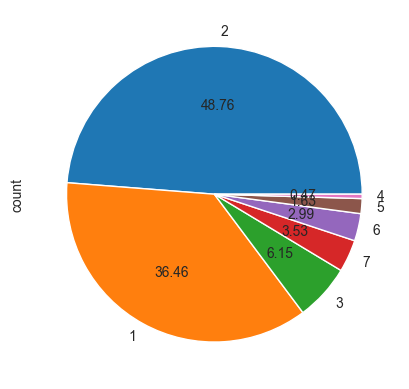

In [18]:
df2['Cover_Type'].value_counts().plot(kind='pie',autopct='%.2f',)
plt.show()

Para ello, voy a llevar a cabo un proceso de submuestreo y reducir el dataset para equilibrarlo en función de CoverType.

In [19]:
import imblearn

# Obtengo la cantidad mínima de entre todas las clases de CoverType
minority_class_count = df2["Cover_Type"].value_counts().min()

minority_class_count

2747

In [35]:
# Hago la ´tecnica del submuestreo --> elijo over sampling
#resampler = imblearn.under_sampling.RandomUnderSampler(random_state=42)
resampler = imblearn.over_sampling.RandomOverSampler(random_state=42)
#resampler = imblearn.over_sampling.SMOTE()

# Aplico el submuestreo más adelante

In [33]:
# Con el nuevo número de instancias, separamos los datos en los conjuntos de entrenamiento y test.
from sklearn.model_selection import train_test_split

X, y = df.drop('Cover_Type',axis=1),df['Cover_Type']

In [34]:
X, y = resampler.fit_resample(X, y) # con esto tengo el submuestreo

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=1)

Como primer paso para crear un clasificador de SVM hay que decidir si hay que hacer algún preprocesamiento adicional sobre los datos. ¿Hace falta normalizar los datos?

Por falta de tiempo para pensarlo, decido que no hay que normalizar los datos.

In [ ]:
## PON AQUÍ TU CÓDIGO SI CONSIDERAS QUE HAY QUE NORMALIZAR LOS DATOS

from sklearn.preprocessing import StandardScaler
from pandas import DataFrame


#scaler = StandardScaler()

## COMPLETAR

Entrena un conjunto de modelos de SVM que utilicen todas las variables del dataset, con C = 0.1 hasta 1000 con cinco valores diferentes; kernel radial, y gamma con valor scale.

In [39]:
import random
from sklearn.svm import SVC

#C = {}
C = []
for i in range(5):
    valor = random.uniform(0.1, 1000)
    C.append(valor)
kernel = 'rbf'
gamma = 'scale'

svc = [SVC(C=i, kernel=kernel, gamma=gamma) for i in C]
svc

[SVC(C=320.3298557167104),
 SVC(C=661.0285663734304),
 SVC(C=298.90823943697643),
 SVC(C=225.695601291626),
 SVC(C=108.19377997073816)]

In [ ]:
scores = []
for model in svc:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    scores.append(score)

In [ ]:
### PON AQUÍ TU CÓDIGO

In [ ]:
for score in scores:
    score

Después de hacer el entrenamiento, visualiza las matrices de confusión de los modelos entrenados.

In [ ]:
preds = []
for model in svc:
    pred = model.predict(X_test)
    preds.append(pred)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test, pred))

In [ ]:
for pred in preds:
    print(confusion_matrix(y_test,pred))

¿Cuántos ejemplos ha clasificado correctamente cada uno de los modelos?

[1] Por falta de tiempo, no me da tiempo a ver los resultados de la matriz de confusión. Para cada "modelo" entrenado, contaría los valores de la diagonal principal y los sumaría.

¿Cuál de todos los modelos que has entrenado obtiene mejores resultados de precision para todas las clases? Si no hay ninguno que consideres que sea óptimo, explica cómo se comporta para cada clase el modelo que consideres que tiene mejores resultados.

In [ ]:
## PON AQUÍ TU CÓDIGO

Esta respuesta ya te la he dado arriba [1]

Selecciona el modelo que consideras que obtiene mejores resultados y realiza las predicciones con el conjunto de datos de test.

In [ ]:
## PON AQUÍ TU CÓDIGO
# ya lo he puesto arriba: el cálculo de preds.

Visualiza la matriz de confusión de los datos de test.
- ¿Cuántos ejemplos ha clasificado bien el modelo?
- ¿Cuántos ejemplos ha clasificado de manera errónea?

In [ ]:
### PON AQUÍ TU CÓDIGO E INDICA TU RESPUESTA

Visualiza los valores de precision, recall, f1 para cada una de las clases. 
- ¿Clasifica de igual manera todas las clases o hay alguna para la que el modelo tiene una mayor capacidad predictiva?

In [ ]:
### PON AQUÍ TU CÓDIGO E INDICA TU RESPUESTA
for pred in preds:
    print(classification_report(y_test, pred))

**Comparativa**

En base al EDA realizado, a las decisiones tomadas sobre los datos e hiperparámetros y a las características computacionales de tu equipo. ¿Qué modelo obtiene mejores resultados de clasificación?

### Investigación

Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de clasificación empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.

_introduce aquí la referencia APA del artículo_

título, autores, revista, año de publicación

Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la clasificación.
Técnicas de clasificación empleadas y si realiza alguna adaptación.
Principales resultados de la aplicación y de la investigación.

DOI: 10.1109/TMECH.2020.3049046
"Feature Analyses and Modeling of Lithium-Ion Battery Manufacturing Based on Random Forest Classification"
Liu, Kailong; Hu, Xiaosong; Zhou, Huiyu; Tong, Lei; Widanage, W. Dhammika; Marco, James
IEEE, 2021-01-05

[pdf](https://www.semanticscholar.org/reader/43b22c5fc7e010b093d389ec6c487496679aa1c1)

Análisis de las características de fabricación de baterías de ion-litio mediante un marco de clasificación basado en Random Forest. El objetivo es desarrollar un marco para cuantificar la importancia, correlaciones y efectos de las características de fabricación de baterías de ion-litio en la clasificación de las propiedades de los electrodos.

El marco RF propuesto logra una clasificación confiable de las propiedades del electrodo; y permite una cuantificación efectiva de la importancia de las características de fabricación (FI) y sus correlaciones.

DOI: https://doi.org/10.1504/IJBET.2021.119504
"Lung cancer diagnosis and staging using firefly algorithm fuzzy C-means segmentation and support vector machine classification of lung nodules"
M. Lavanya; P. Muthu Kannan; M. Arivalagan
International Journal of Biomedical Engineering and Technology, 2021-12-01

El artículo propone un método para la segmentación y clasificación de nódulos pulmonares en imágenes de tomografía computarizada (TC). El método combina técnicas de mejora de imagen, segmentación por algoritmos de enjambre y clasificación por SVM para obtener una detección precisa del cáncer de pulmón.

El método logra una alta precisión en la segmentación de nódulos pulmonares, incluso con imágenes de baja calidad. Además, la clasificación por SVM permite diferenciar entre nódulos benignos y malignos con una alta tasa de éxito.
Por último, el método se ha probado en un conjunto de datos de imágenes de TC con resultados prometedores.